<a href="https://colab.research.google.com/github/Reneress/Mineracao/blob/master/16_GMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

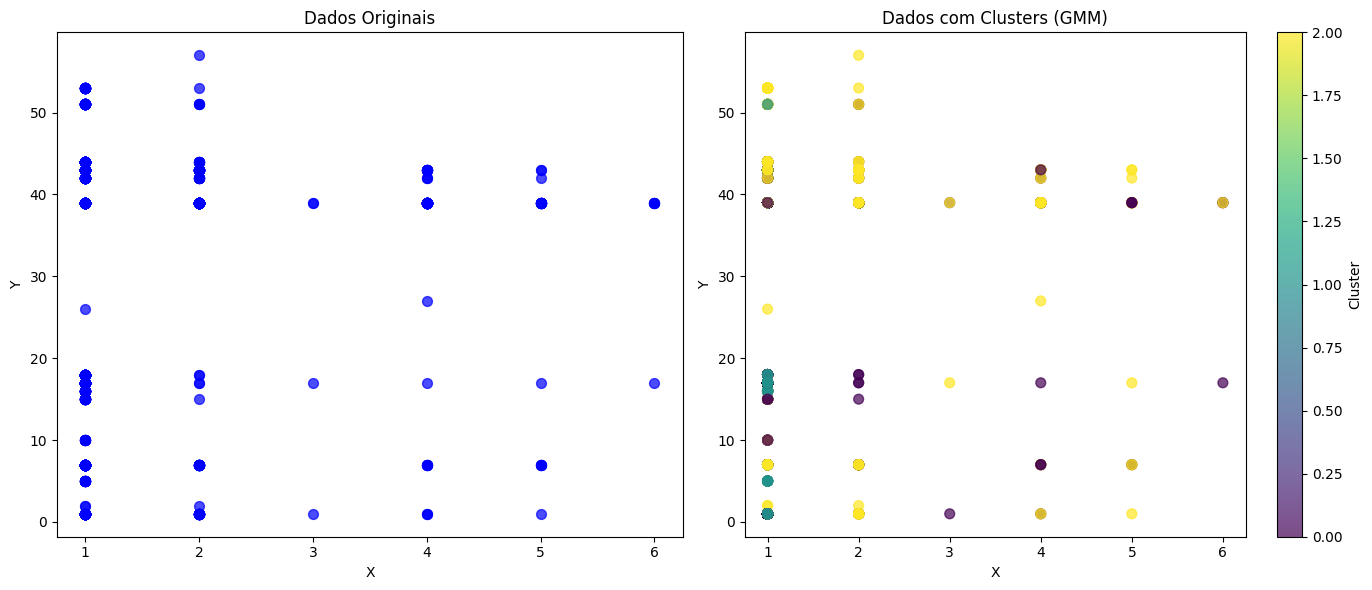

GMM concluído e os clusters foram salvos em 'dataAlter_with_clusters.csv'.
Acurácia: 0.23


In [7]:
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Carregar o dataset
data = pd.read_csv('dataAlter.csv')

# Supondo que o dataset tenha pelo menos duas colunas para visualização (x e y)
# Se não, você pode adaptar conforme necessário
x = data.iloc[:, 0]  # Supondo que a primeira coluna é a variável x
y = data.iloc[:, 1]  # Supondo que a segunda coluna é a variável y

# Normalizar os dados
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Definir o número de clusters (componentes gaussianos)
n_components = 3  # Alterar conforme a necessidade

# Criar e ajustar o modelo GMM
gmm = GaussianMixture(n_components=n_components, random_state=42)
gmm.fit(scaled_data)

# Prever os clusters
clusters = gmm.predict(scaled_data)

# Adicionar os clusters ao DataFrame
data['Cluster'] = clusters

# Plotar os dados originais e os dados com clusters
plt.figure(figsize=(14, 6))

# Subplot 1: Dados originais
plt.subplot(1, 2, 1)
plt.scatter(x, y, c='blue', s=50, alpha=0.7)
plt.title('Dados Originais')
plt.xlabel('X')
plt.ylabel('Y')

# Subplot 2: Dados com clusters
plt.subplot(1, 2, 2)
scatter = plt.scatter(x, y, c=clusters, s=50, cmap='viridis', alpha=0.7)
plt.title('Dados com Clusters (GMM)')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar(scatter, label='Cluster')

plt.tight_layout()
plt.show()

# Salvar o DataFrame com os clusters em um novo arquivo CSV
data.to_csv('dataAlter_with_clusters.csv', index=False)

print("GMM concluído e os clusters foram salvos em 'dataAlter_with_clusters.csv'.")

# Se você tiver rótulos verdadeiros para calcular a acurácia
# Suponha que os rótulos verdadeiros estejam na coluna 'True_Label' do dataset
if 'Target' in data.columns:
    true_labels = data['Target']
    accuracy = accuracy_score(true_labels, clusters)
    print(f"Acurácia: {accuracy:.2f}")
else:
    print("Não há rótulos verdadeiros para calcular a acurácia.")
